# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1800)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1800)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

df=pd.DataFrame(cities)
df=df.rename(columns={0: 'city'})
df.head()

,city
0,vila franca do campo
1,rikitea
2,mataura
3,cape town
4,aranos


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
df['temp']=""
df['max temp']=""
df['humidity']=""
df['cloudiness']=""
df['wind speed']=""
df['lat']=""
df['lon']=""
df['city country']=""
df['city datetime']=""

for index, row in df.iterrows():
    city = row['city']
    print(f"Processing Record {index + 1} | {city}")
    city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + api_key
    
    weather = requests.get(url).json()
    try:
        df.loc[index, 'temp'] = weather['main']['temp']
        df.loc[index, 'max temp'] = weather['main']['temp_max']
        df.loc[index, 'humidity'] = weather['main']['humidity']
        df.loc[index, 'wind speed'] = weather['wind']['speed']
        df.loc[index, 'cloudiness'] = weather['clouds']['all']
        df.loc[index, 'city country'] = weather['sys']['country']
        df.loc[index, 'city datetime'] = weather['dt']
        df.loc[index, 'lat'] = weather['coord']['lat']
        df.loc[index, 'lon'] = weather['coord']['lon']
    except Exception:
        df.loc[index, 'temp'] = 'city not found'
        df.loc[index, 'max temp'] = 'city not found'
        df.loc[index, 'humidity'] = 'city not found'
        df.loc[index, 'wind speed'] = 'city not found'
        df.loc[index, 'cloudiness'] = 'city not found'
        df.loc[index, 'city country'] = 'city not found'
        df.loc[index, 'city datetime'] = 'city not found'
        df.loc[index, 'lat'] = 'city not found'
        df.loc[index, 'lon'] = 'city not found'
        
        print("City not found. Skipping...")
    time.sleep(.50)
    
print("--------------------_--")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 | vila franca do campo
Processing Record 2 | rikitea
Processing Record 3 | mataura
Processing Record 4 | cape town
Processing Record 5 | aranos
Processing Record 6 | kapaa
Processing Record 7 | castro
Processing Record 8 | oksfjord
Processing Record 9 | carnarvon
Processing Record 10 | nouadhibou
Processing Record 11 | springfield
Processing Record 12 | rio grande
Processing Record 13 | tamandare
Processing Record 14 | shimoda
Processing Record 15 | lagoa
Processing Record 16 | beringovskiy
Processing Record 17 | busselton
Processing Record 18 | avarua
Processing Record 19 | synya
Processing Record 20 | provideniya
Processing Record 21 | fortuna
Processing Record 22 | bojnurd
Processing Record 23 | antalaha
Processing Record 24 | ushuaia
Processing Record 25 | torbay
Processing Record 26 | jaipur hat
Processing Record 27 | kamenka
Processing Record 28 | bethel
Processing Record 29 | albany
Processing Record 30 | port elizabeth
Processing Record 31 | puerto ayora
Pro

Processing Record 232 | samalaeulu
City not found. Skipping...
Processing Record 233 | thompson
Processing Record 234 | clyde river
Processing Record 235 | ngukurr
City not found. Skipping...
Processing Record 236 | ganzhou
Processing Record 237 | rodrigues alves
Processing Record 238 | sentyabrskiy
City not found. Skipping...
Processing Record 239 | eldikan
City not found. Skipping...
Processing Record 240 | ribeira grande
Processing Record 241 | izazi
Processing Record 242 | leningradskiy
Processing Record 243 | krasnoborsk
Processing Record 244 | vila do maio
Processing Record 245 | salym
Processing Record 246 | bria
Processing Record 247 | saskylakh
Processing Record 248 | ornskoldsvik
Processing Record 249 | ushtobe
Processing Record 250 | mahebourg
Processing Record 251 | tallahassee
Processing Record 252 | sault sainte marie
Processing Record 253 | dingle
Processing Record 254 | namatanai
Processing Record 255 | parksepa
Processing Record 256 | cherskiy
Processing Record 257 | t

Processing Record 454 | tomatlan
Processing Record 455 | pokhara
Processing Record 456 | pointe michel
City not found. Skipping...
Processing Record 457 | katsuura
Processing Record 458 | qasigiannguit
Processing Record 459 | isangel
Processing Record 460 | tabou
Processing Record 461 | jumla
Processing Record 462 | bud
Processing Record 463 | okhotsk
Processing Record 464 | hue
Processing Record 465 | goderich
Processing Record 466 | gurskoye
City not found. Skipping...
Processing Record 467 | nantai
Processing Record 468 | grand gaube
Processing Record 469 | loukhi
Processing Record 470 | khalkhal
Processing Record 471 | maumere
Processing Record 472 | cascais
Processing Record 473 | itaperuna
Processing Record 474 | valdivia
Processing Record 475 | pangnirtung
Processing Record 476 | itaituba
Processing Record 477 | balaipungut
Processing Record 478 | mujiayingzi
Processing Record 479 | hunza
City not found. Skipping...
Processing Record 480 | kinablangan
Processing Record 481 | nou

Processing Record 681 | shingu
Processing Record 682 | tabialan
City not found. Skipping...
Processing Record 683 | south venice
Processing Record 684 | teya
Processing Record 685 | pimentel
Processing Record 686 | dongsheng
Processing Record 687 | merrill
Processing Record 688 | grand-lahou
Processing Record 689 | swan hill
Processing Record 690 | shelburne
Processing Record 691 | schilde
Processing Record 692 | vostok
Processing Record 693 | nemuro
Processing Record 694 | tual
Processing Record 695 | asbestos
Processing Record 696 | oranjemund
Processing Record 697 | emerald
Processing Record 698 | bocas del toro
Processing Record 699 | salalah
Processing Record 700 | kalmunai
Processing Record 701 | ojinaga
Processing Record 702 | bolungarvik
City not found. Skipping...
Processing Record 703 | tulum
Processing Record 704 | la rioja
City not found. Skipping...
Processing Record 705 | luwuk
Processing Record 706 | maraa
Processing Record 707 | mount gambier
Processing Record 708 | rio

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = df[df.temp!='city not found']
df.count()

city             636
temp             636
max temp         636
humidity         636
cloudiness       636
wind speed       636
lat              636
lon              636
city country     636
city datetime    636
dtype: int64

In [5]:
export_csv = df.to_csv("cities.csv")

df.head()                     

,city,temp,max temp,humidity,cloudiness,wind speed,lat,lon,city country,city datetime
0,vila franca do campo,57.7,61,100,57,5.82,45.18,8.4,IT,1572031674
1,rikitea,72.12,72.12,83,82,22.75,-23.12,-134.97,PF,1572031675
2,mataura,46.99,46.99,95,63,1.99,-46.19,168.86,NZ,1572031675
3,cape town,71.6,71.6,35,100,5.82,-36.41,-71.9,CL,1572031676
4,aranos,86.83,86.83,13,49,24.54,-24.14,19.11,NA,1572031677


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

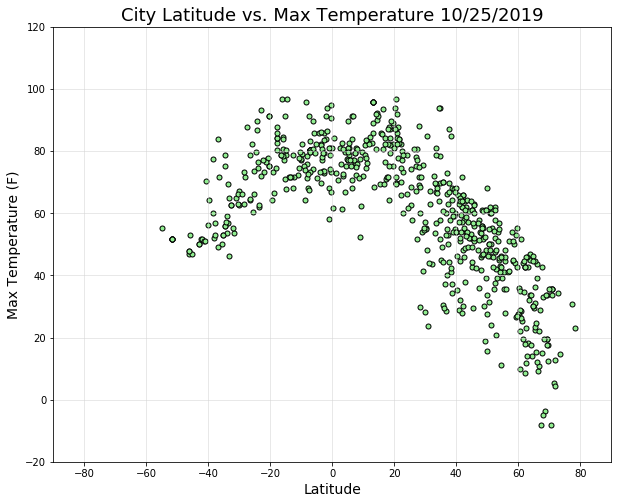

In [11]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['max temp'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Max Temperature {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Max Temperature (F)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'lightgrey')
plt.ylim(-20,120)
plt.xlim(-90,90)

plt.savefig('Latitude_vs_Temp.png') 

plt.show()

#### Latitude vs. Humidity Plot

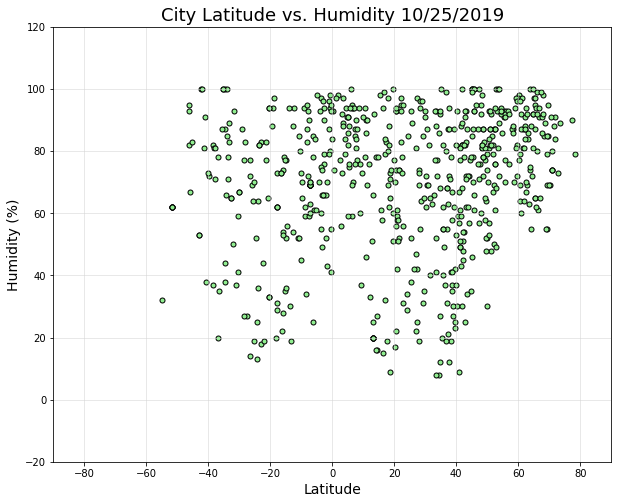

In [8]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['humidity'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Humidity {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Humidity (%)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'lightgrey')
plt.ylim(-20,120)
plt.xlim(-90,90)

plt.savefig('Latitude_vs_Humidity.png') 

plt.show()


#### Latitude vs. Cloudiness Plot

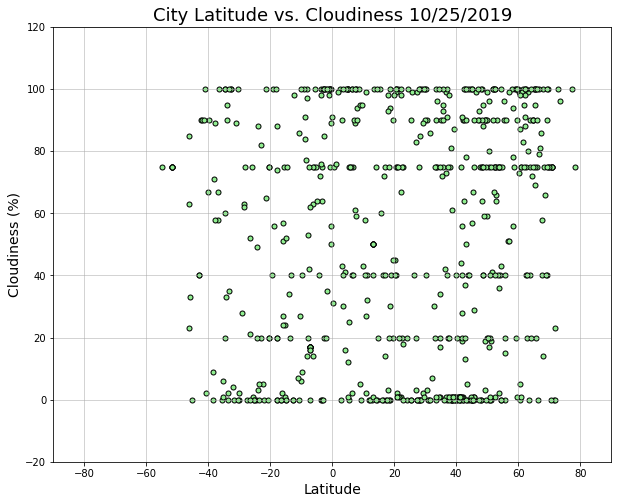

In [9]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['cloudiness'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Cloudiness {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Cloudiness (%)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'darkgrey')
plt.ylim(-20,120)
plt.xlim(-90,90)

plt.savefig('Latitude_vs_Cloudiness.png') 

plt.show()


#### Latitude vs. Wind Speed Plot

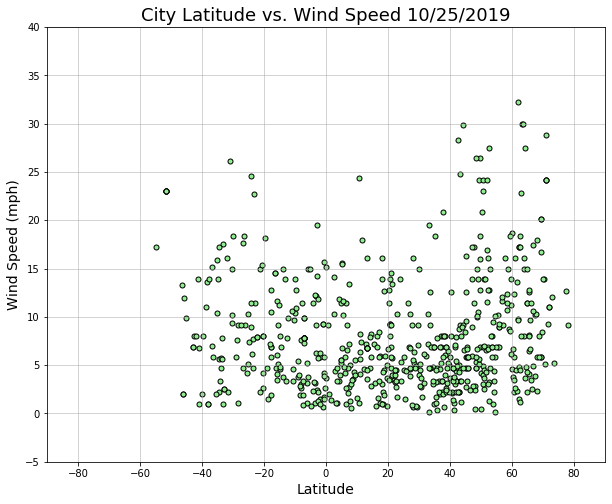

In [10]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['wind speed'], s=25, edgecolor = 'black', facecolor= 'lightgreen')
plt.title(f"City Latitude vs. Wind Speed {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")
plt.grid(True, linewidth = .5, color = 'darkgrey')
plt.ylim(-5,40)
plt.xlim(-90,90)

plt.savefig('Latitude_vs_WindSpeed.png') 

plt.show()


# Observable Trends